# Financial Data Analysis Pipeline: From API to Automated Insights

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    
📘 **Author:** Teslim Uthman Adeyanju  
📫 **Email:** [info@adeyanjuteslim.co.uk](mailto:info@adeyanjuteslim.co.uk)  
🔗 **LinkedIn:** [linkedin.com/in/adeyanjuteslimuthman](https://www.linkedin.com/in/adeyanjuteslimuthman)  
🌐 **Website & Blog:** [adeyanjuteslim.co.uk](https://adeyanjuteslim.co.uk)  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    


In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

# 📚 1.0 INTRODUCTION


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section provides an overview of the dataset and the problem we are trying to solve. We will also discuss the data overview, project objective, methodology and the tools (libaries) we will use to solve the problem.

</div>

## 🔍 1.1 GDP Overview
____

The Real Potential GDP (GDPPOT) dataset from the Federal Reserve Economic Data (FRED) provides a comprehensive view of the U.S. economy's potential output. This dataset is crucial for understanding economic growth, inflation, and overall economic health. By analyzing GDPPOT, policymakers and economists can better assess the economy's performance relative to its potential, identify output gaps, and make informed decisions to promote sustainable growth.

This data will cover 70 years of economic data, from 1955 to 2025, and will be used to analyze the trends in the U.S. economy's potential output over time. The dataset includes quarterly data points, allowing for a detailed examination of economic fluctuations and long-term trends.

In [2]:
# Setting the Date 
end = date.today()  
print(f'Year = {end.year}; month= {end.month}; day={end.day}')  

start = date(year=end.year-70, 
             month=end.month, 
             day=end.day)  

print(f'Period for indexes: {start} to {end} ')  

Year = 2025; month= 7; day=6
Period for indexes: 1955-07-06 to 2025-07-06 


### Real Potential GDP (GDPPOT) Analysis — U.S. FRED Data

The data source for this analysis is the Federal Reserve Economic Data (FRED) database, which provides a wealth of economic data. The GDPPOT dataset specifically focuses on the Real Potential GDP, which is a measure of the economy's maximum sustainable output, adjusted for inflation.

In [3]:
# Download GDPPOT data from FRED
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [11]:
gdppot.to_csv('gdppot.csv')

In [12]:
gdppot = pd.read_csv('gdppot.csv')

In [13]:
gdppot.head()

,DATE,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
0,1955-10-01,3019.152595,NaN,NaN
1,1956-01-01,3038.588138,NaN,0.006437
2,1956-04-01,3057.448970,NaN,0.006207
3,1956-07-01,3077.140146,NaN,0.006440
4,1956-10-01,3098.206236,0.026184,0.006846


The calculation will focused on the Real Potential GDP (GDPPOT) data, which is a key indicator of the economy's potential output. The analysis will involve calculating the growth rate of GDPPOT, identifying trends, and visualizing the data to provide insights into the U.S. economy's performance.

### Growth Rate Calculations

**Year-over-Year (YoY) Growth Rate**: Measures the percentage change in GDP from one year to the next.

In [14]:
gdppot['gdppot_us_yoy'] = gdppot['GDPPOT'] / gdppot['GDPPOT'].shift(4) - 1


In [15]:
gdppot['gdppot_us_yoy']

0           NaN
1           NaN
2           NaN
3           NaN
4      0.026184
         ...   
275    0.023223
276    0.023249
277    0.023113
278    0.023029
279    0.023013
Name: gdppot_us_yoy, Length: 280, dtype: float64

**Quarter-over-Quarter (QoQ) Growth Rate**: Measures the percentage change in GDP from one quarter to the next.

In [16]:
gdppot['gdppot_us_qoq'] = gdppot['GDPPOT'] / gdppot['GDPPOT'].shift(1) - 1


In [17]:
gdppot['gdppot_us_qoq']

0           NaN
1      0.006437
2      0.006207
3      0.006440
4      0.006846
         ...   
275    0.005753
276    0.005745
277    0.005619
278    0.005716
279    0.005737
Name: gdppot_us_qoq, Length: 280, dtype: float64

In [18]:
# View recent data
gdppot.tail(15)

,DATE,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
265,2022-01-01,21722.02480,0.020882,0.005366
266,2022-04-01,21840.56636,0.021403,0.005457
267,2022-07-01,21961.53508,0.021799,0.005539
268,2022-10-01,22084.92536,0.022162,0.005618
269,2023-01-01,22208.24254,0.022384,0.005584
270,2023-04-01,22333.11239,0.022552,0.005623
271,2023-07-01,22459.74068,0.022685,0.005670
272,2023-10-01,22588.18459,0.022787,0.005719
273,2024-01-01,22718.13000,0.022959,0.005753
274,2024-04-01,22849.87000,0.023139,0.005799


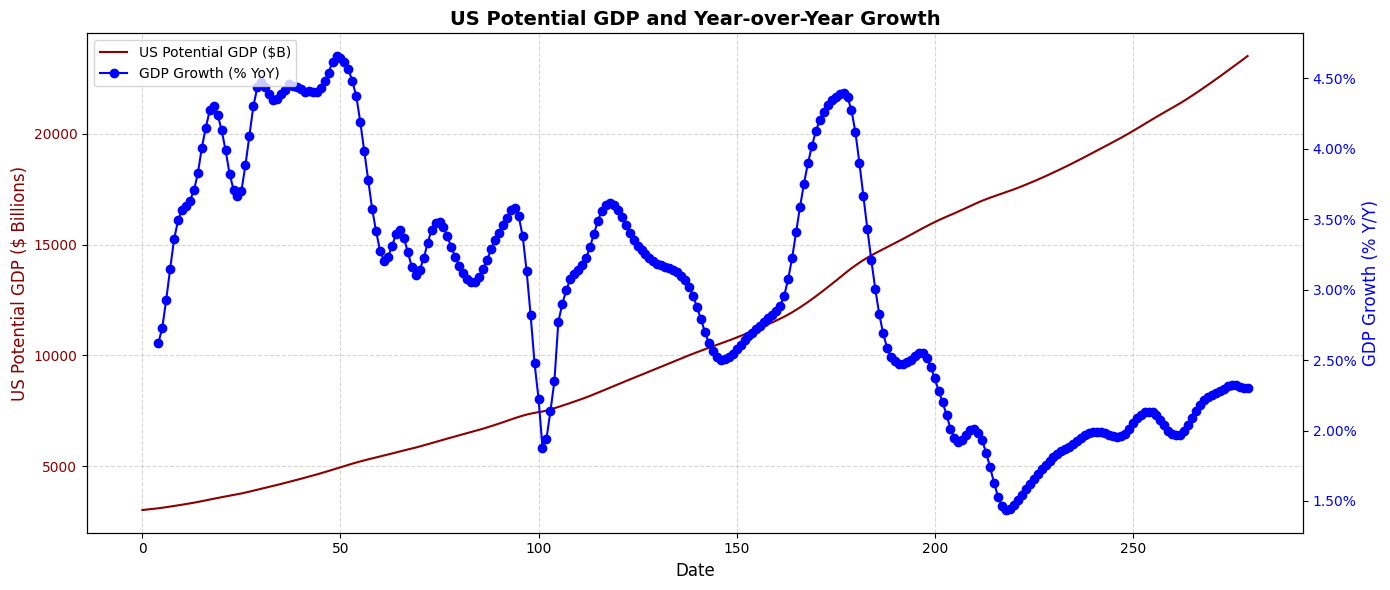

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot US Potential GDP on the left y-axis
ax1.plot(gdppot.index, gdppot.GDPPOT, color='darkred', label='US Potential GDP ($B)')
ax1.set_ylabel('US Potential GDP ($ Billions)', color='darkred', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkred')

# Create secondary y-axis for YoY growth (%)
ax2 = ax1.twinx()
ax2.plot(gdppot.index, gdppot.gdppot_us_yoy, color='blue', marker='o', label='GDP Growth (% YoY)')
ax2.set_ylabel('GDP Growth (% Y/Y)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Labels and grid
ax1.set_xlabel('Date', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Title
plt.title('US Potential GDP and Year-over-Year Growth', fontsize=14, fontweight='bold')

# Combine and display legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


## 🔍 1.1 Inflation Overview
____

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime, timedelta


**Fetch Core CPI Data from FRED**: 

We will retrieve the Core Consumer Price Index (CPI) data from the FRED database. The Core CPI excludes food and energy prices, providing a clearer view of underlying inflation trends. The Core CPI is a key indicator of inflation, as it reflects the price changes of a basket of goods and services that consumers typically purchase.

In [21]:
def get_core_cpi_data(start=None, end=None):
    if start is None:
        start = datetime.today() - timedelta(days=365*10)  # Default: last 10 years

    # Download Core CPI data (CPILFESL)
    df = web.DataReader("CPILFESL", "fred", start, end)
    df.rename(columns={"CPILFESL": "core_cpi_index"}, inplace=True)
    
    # Calculate YoY and MoM growth
    df["yoy_growth"] = df["core_cpi_index"].pct_change(12) * 100
    df["mom_growth"] = df["core_cpi_index"].pct_change(1) * 100
    df["mom_annualized"] = ((1 + df["mom_growth"] / 100) ** 12 - 1) * 100

    return df

# Call the function and store the result in a variable
df_cpi = get_core_cpi_data()

In [22]:
df_cpi = df_cpi.to_csv('df_cpi.csv')

In [23]:
from datetime import date, datetime, timedelta
import pandas_datareader.data as web
import pandas as pd

# Step 1: Set the date range
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')  

start = date(year=end.year - 70, month=end.month, day=end.day)  
print(f'Period for indexes: {start} to {end}')  

# Step 2: Define the function (same as before)
def get_core_cpi_data(start=None, end=None):
    if start is None:
        start = datetime.today() - timedelta(days=365*10)  # Default: last 10 years

    df = web.DataReader("CPILFESL", "fred", start, end)
    df.rename(columns={"CPILFESL": "core_cpi_index"}, inplace=True)

    df["yoy_growth"] = df["core_cpi_index"].pct_change(12) * 100
    df["mom_growth"] = df["core_cpi_index"].pct_change(1) * 100
    df["mom_annualized"] = ((1 + df["mom_growth"] / 100) ** 12 - 1) * 100

    return df

# Step 3: Call the function using custom start and end dates
df_cpi = get_core_cpi_data(start=start, end=end)

# Step 4: Display the result
print(df_cpi.tail())


Year = 2025; month= 7; day=6
Period for indexes: 1955-07-06 to 2025-07-06
            core_cpi_index  yoy_growth  mom_growth  mom_annualized
DATE                                                              
2025-01-01         324.739    3.292100    0.446340        5.489543
2025-02-01         325.475    3.143668    0.226644        2.753882
2025-03-01         325.659    2.808733    0.056533        0.680506
2025-04-01         326.430    2.781521    0.236751        2.878296
2025-05-01         326.854    2.767149    0.129890        1.569864


### Plot the CPI Index and Growth Rates

Note:
* The first chart shows the CPI index and YoY growth on dual axes.
* The second chart compares YoY and annualized MoM growth to assess inflation trends.

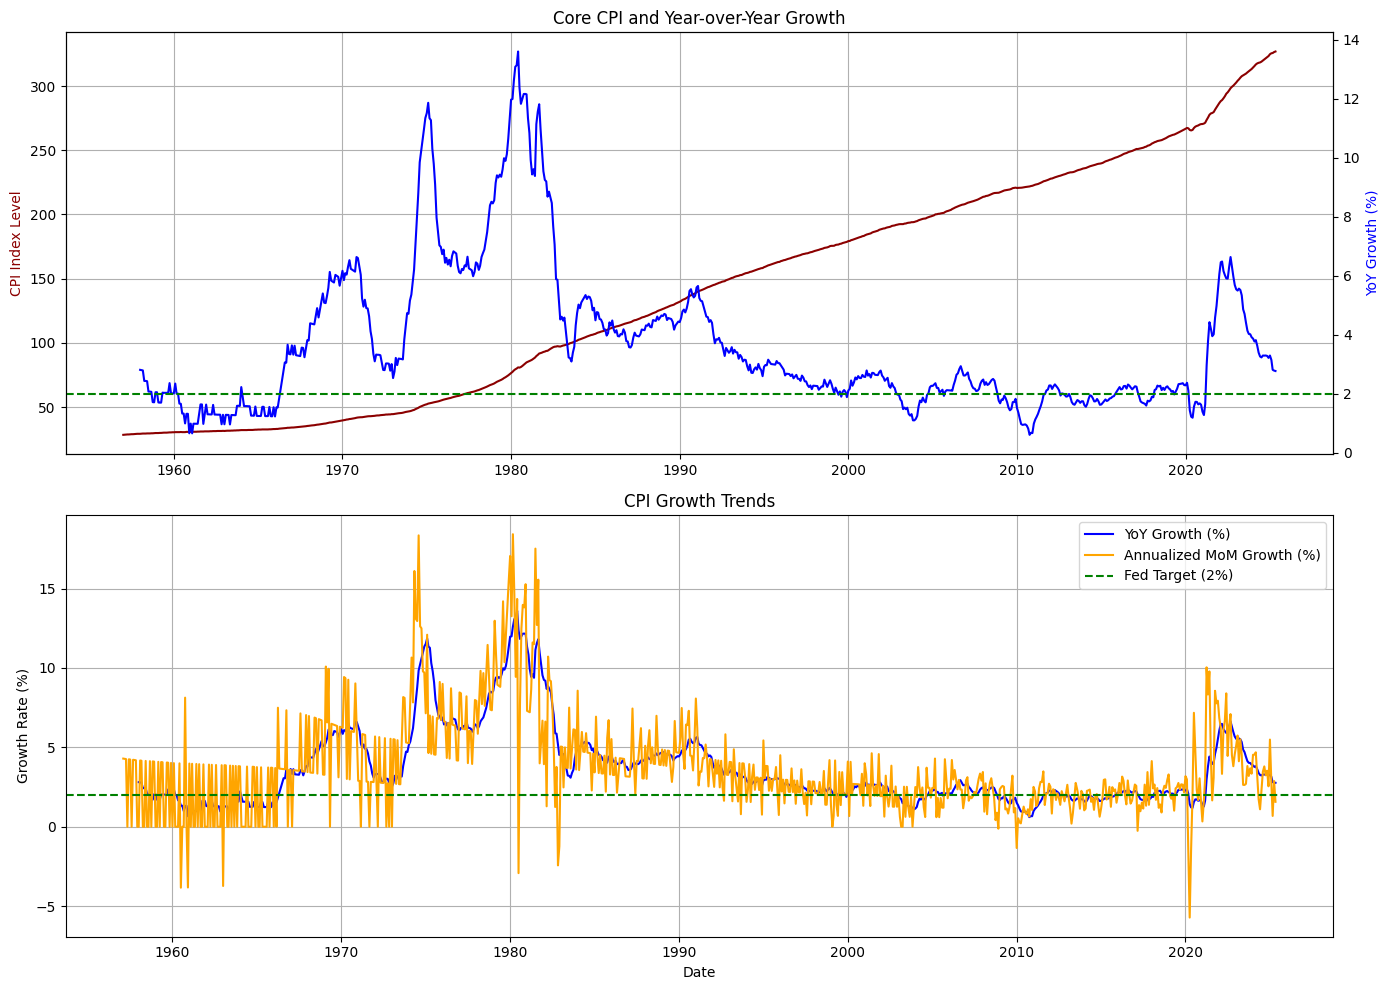

In [24]:
def plot_cpi(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # --- First Plot: CPI Index and YoY Growth ---
    ax1.plot(df.index, df["core_cpi_index"], color='darkred', label="CPI Index")
    ax1.set_ylabel("CPI Index Level", color='darkred')

    ax1_twin = ax1.twinx()
    ax1_twin.plot(df.index, df["yoy_growth"], color='blue', label="YoY Growth (%)")
    ax1_twin.axhline(2, color='green', linestyle='--', label="Fed Target (2%)")
    ax1_twin.set_ylabel("YoY Growth (%)", color='blue')
    ax1.set_title("Core CPI and Year-over-Year Growth")
    ax1.grid(True)

    # --- Second Plot: YoY vs Annualized MoM Growth ---
    ax2.plot(df.index, df["yoy_growth"], label="YoY Growth (%)", color='blue')
    ax2.plot(df.index, df["mom_annualized"], label="Annualized MoM Growth (%)", color='orange')
    ax2.axhline(2, color='green', linestyle='--', label="Fed Target (2%)")
    ax2.set_title("CPI Growth Trends")
    ax2.set_ylabel("Growth Rate (%)")
    ax2.set_xlabel("Date")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_cpi(df_cpi)

In [25]:
def summarize_inflation(df, months=12):
    recent = df.tail(months)

    return {
        "Latest CPI": df["core_cpi_index"].iloc[-1],
        "Latest YoY Growth (%)": df["yoy_growth"].iloc[-1],
        "Latest MoM Growth (%)": df["mom_growth"].iloc[-1],
        "Avg YoY Growth (12m)": recent["yoy_growth"].mean(),
        "Volatility YoY (12m)": recent["yoy_growth"].std(),
        "Months Above 2% (YoY)": (recent["yoy_growth"] > 2).sum(),
        "Trend": "Rising" if df["yoy_growth"].iloc[-1] > df["yoy_growth"].iloc[-3] else "Falling"
    }

# Call the summary function
inflation_summary = summarize_inflation(df_cpi)
for key, value in inflation_summary.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}") 

Latest CPI: 326.85
Latest YoY Growth (%): 2.77
Latest MoM Growth (%): 0.13
Avg YoY Growth (12m): 3.14
Volatility YoY (12m): 0.22
Months Above 2% (YoY): 12
Trend: Falling


## 🔍 1.1 Interest rate Overview
____

In [26]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

,FEDFUNDS
DATE,
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33
2025-03-01,4.33
2025-04-01,4.33
2025-05-01,4.33


In [27]:
fedfunds = fedfunds.to_csv('fedfunds.csv')

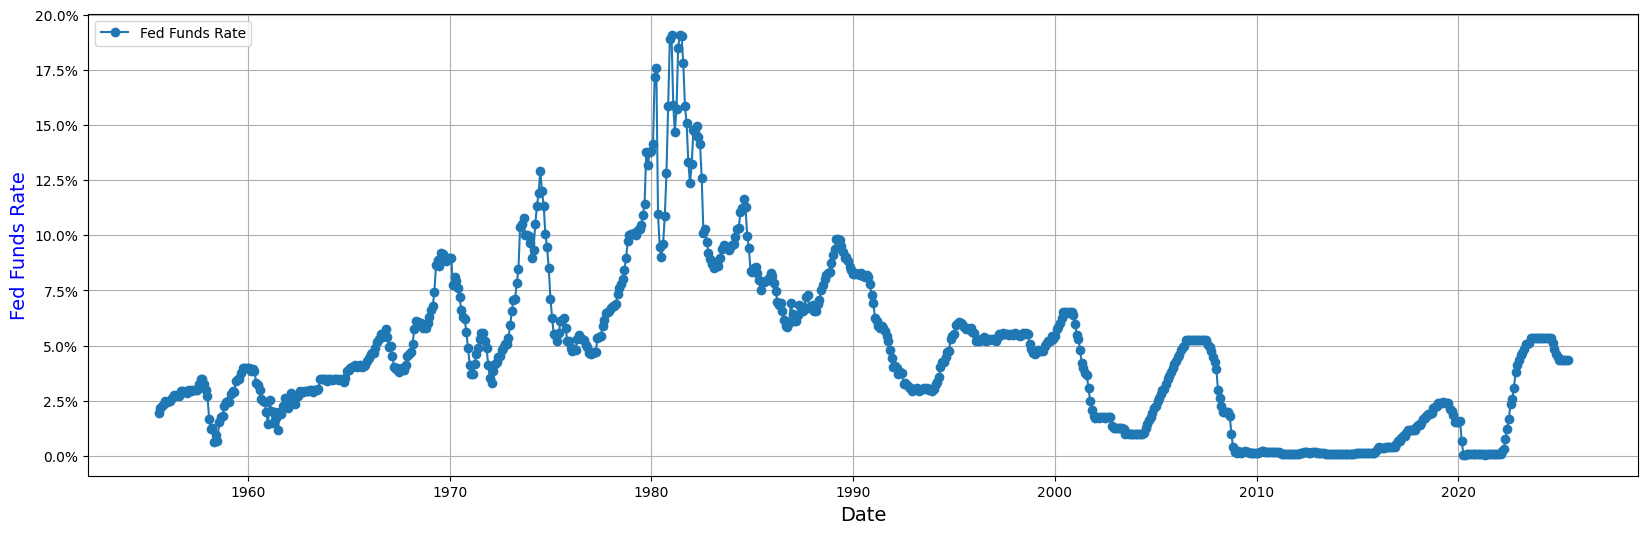

In [29]:
# Load the fedfunds data from the CSV file
fedfunds = pd.read_csv('fedfunds.csv', index_col=0, parse_dates=True)

# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

## 🔍 1.1 SNP 500
____

In [30]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-03,6246.46,6284.65,6246.46,6279.35,1.839510e+09
2025-07-02,6193.88,6227.60,6188.29,6227.42,3.141260e+09
2025-07-01,6187.25,6210.78,6177.97,6198.01,3.572881e+09
2025-06-30,6193.36,6215.08,6174.97,6204.95,3.332438e+09
2025-06-27,6150.70,6187.68,6132.35,6173.07,4.642836e+09


In [37]:
# Save spx_index to CSV if it's not None
if spx_index is not None:
	spx_index.to_csv('spx_index.csv')
	print("S&P 500 index data saved to CSV")
else:
	print("Loading S&P 500 data from CSV")
	spx_index = pd.read_csv('spx_index.csv', index_col=0, parse_dates=True)

S&P 500 index data saved to CSV


In [38]:
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-03,6246.46,6284.65,6246.46,6279.35,1.839510e+09
2025-07-02,6193.88,6227.60,6188.29,6227.42,3.141260e+09
2025-07-01,6187.25,6210.78,6177.97,6198.01,3.572881e+09
2025-06-30,6193.36,6215.08,6174.97,6204.95,3.332438e+09
2025-06-27,6150.70,6187.68,6132.35,6173.07,4.642836e+09


In [39]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [40]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2025-07-03,6246.46,6284.65,6246.46,6279.35,1.839510e+09,0.008339,0.107280,0.146894
2025-07-02,6193.88,6227.60,6188.29,6227.42,3.141260e+09,0.004745,0.105511,0.140453
2025-07-01,6187.25,6210.78,6177.97,6198.01,3.572881e+09,-0.001118,0.104450,0.130432
2025-06-30,6193.36,6215.08,6174.97,6204.95,3.332438e+09,0.005164,0.111811,0.132724
2025-06-27,6150.70,6187.68,6132.35,6173.07,4.642836e+09,0.005219,0.084267,0.128676


In [41]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

In [42]:
spx_truncated

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2025-07-03,6246.46,6284.65,6246.46,6279.35,1.839510e+09,0.008339,0.107280,0.146894
2025-07-02,6193.88,6227.60,6188.29,6227.42,3.141260e+09,0.004745,0.105511,0.140453
2025-07-01,6187.25,6210.78,6177.97,6198.01,3.572881e+09,-0.001118,0.104450,0.130432
2025-06-30,6193.36,6215.08,6174.97,6204.95,3.332438e+09,0.005164,0.111811,0.132724
2025-06-27,6150.70,6187.68,6132.35,6173.07,4.642836e+09,0.005219,0.084267,0.128676
...,...,...,...,...,...,...,...,...
1990-01-08,352.20,354.24,350.54,353.79,7.783889e+07,0.004514,-0.013908,0.259129
1990-01-05,355.67,355.67,351.35,352.20,8.807222e+07,-0.009756,-0.013362,0.254854
1990-01-04,358.76,358.76,352.89,355.67,9.833333e+07,-0.008613,-0.003558,0.270205


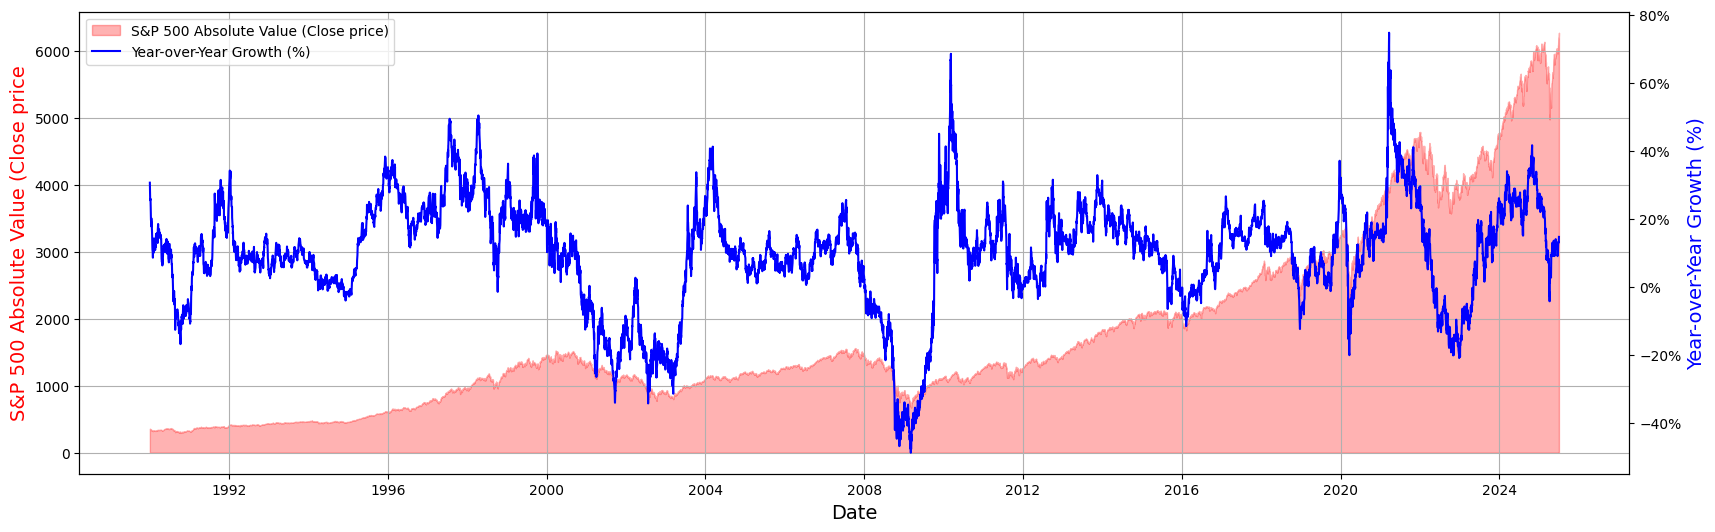

In [43]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 🔍 1.1 Open-High-Low-Close-Volum(OHLCV) - DAX index
____

In [44]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
# Option 1: dax_daily = yf.download(tickers = ["^GDAXI"],
#                      period = "max",
#                      interval = "1d")

# Option 2 (preferred):
# Download data with Adj Close for more accurate price reflections
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(start = start)

In [45]:
dax_daily = dax_daily.to_csv('dax_daily.csv')

In [48]:
# Load the DAX data from CSV
dax_daily = pd.read_csv('dax_daily.csv', index_col=0, parse_dates=True)
dax_daily.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0


In [49]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Close'] / dax_daily['adj_close_last_year'] -1

In [50]:
dax_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_last_year,yoy_growth
Date,,,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0,NaN,NaN
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0,NaN,NaN
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0,NaN,NaN
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0,NaN,NaN
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-30 00:00:00+02:00,24109.150391,24120.820312,23854.310547,23909.609375,70772100,0.0,0.0,18290.660156,0.307203
2025-07-01 00:00:00+02:00,23966.949219,23978.300781,23671.269531,23673.289062,61850200,0.0,0.0,18164.060547,0.303304
2025-07-02 00:00:00+02:00,23789.060547,23824.500000,23620.419922,23790.109375,53388000,0.0,0.0,18374.529297,0.294733


## 🔍 1.1 Open-High-Low-Close-Volum(OHLCV) - SNP 500
____

In [51]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
# https://www.investopedia.com/insights/introduction-to-stock-market-indices/

ticker_obj = yf.Ticker("^GSPC")
snp500_daily_non_delayed = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
#                      period = "max",
#                      interval = "1d")

In [52]:
snp500_daily_non_delayed  = snp500_daily_non_delayed.to_csv('snp500_daily_non_delayed.csv')

In [54]:
# Load the S&P 500 data from CSV
snp500_daily_non_delayed = pd.read_csv('snp500_daily_non_delayed.csv', index_col=0, parse_dates=True)
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,0.0,0.0
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,0.0,0.0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,0.0,0.0
2025-07-02 00:00:00-04:00,6193.879883,6227.600098,6188.290039,6227.419922,5645710000,0.0,0.0
2025-07-03 00:00:00-04:00,6246.459961,6284.649902,6246.459961,6279.350098,3378110000,0.0,0.0


## 🔍 1.1 Macro Economy Data
____

In [55]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [56]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency    96.99     97.18   165.00     70.70   
1               Stock Market  6279.00   6227.00  6287.00      4.40   
2            GDP Growth Rate    -0.50      2.40    35.20    -28.10   
3     GDP Annual Growth Rate     2.00      2.50    13.40     -7.50   
4          Unemployment Rate     4.10      4.20    14.90      2.50   
5          Non Farm Payrolls   147.00    144.00  4631.00 -20471.00   
6             Inflation Rate     2.40      2.30    23.70    -15.80   
7         Inflation Rate MoM     0.10      0.20     2.00     -1.80   
8              Interest Rate     4.50      4.50    20.00      0.25   
9           Balance of Trade   -71.52    -60.26     1.95   -138.00   
10           Current Account  -450.00   -312.00     9.96   -450.00   
11    Current Account to GDP    -3.90     -3.30     0.20     -6.00   
12    Government Debt to GDP   124.00    122.00   126.00     31.80   
13         Governmen

/var/folders/v9/v9j8bf6j2r5cr97thvfgxxyh0000gn/T/ipykernel_48628/51921383.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [ ]:
# Save macro data to CSV
df.to_csv('macro_data.csv', index=False)

In [70]:
macro_data = pd.read_csv('macro_data.csv')
macro_data

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,96.99,97.18,165.00,70.70,NaN,Jul/25
1,Stock Market,6279.00,6227.00,6287.00,4.40,points,Jul/25
2,GDP Growth Rate,-0.50,2.40,35.20,-28.10,percent,Mar/25
3,GDP Annual Growth Rate,2.00,2.50,13.40,-7.50,percent,Mar/25
4,Unemployment Rate,4.10,4.20,14.90,2.50,percent,Jun/25
5,Non Farm Payrolls,147.00,144.00,4631.00,-20471.00,Thousand,Jun/25
6,Inflation Rate,2.40,2.30,23.70,-15.80,percent,May/25
7,Inflation Rate MoM,0.10,0.20,2.00,-1.80,percent,May/25
8,Interest Rate,4.50,4.50,20.00,0.25,percent,Jun/25
9,Balance of Trade,-71.52,-60.26,1.95,-138.00,USD Billion,May/25


## 🔍 1.1 Financial reporting - EDGAR (in Yahoo)
____

In [71]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [72]:
# yearly financials for the last 4 years
nvda.financials


,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.0,0.0,-284130000.0,0.0
Tax Rate For Calcs,0.133,0.12,0.21,0.019
Normalized EBITDA,86137000000.0,35583000000.0,7339000000.0,11351000000.0
Total Unusual Items,0.0,0.0,-1353000000.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,-1353000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,72880000000.0,29760000000.0,4368000000.0,9752000000.0
Reconciled Depreciation,1864000000.0,1508000000.0,1543000000.0,1174000000.0
Reconciled Cost Of Revenue,32639000000.0,16621000000.0,11618000000.0,9439000000.0
EBITDA,86137000000.0,35583000000.0,5986000000.0,11351000000.0
EBIT,84273000000.0,34075000000.0,4443000000.0,10177000000.0


In [73]:
# balance sheet
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN
